# Dataset Exploration

## Load Dataset

Total number of car images:  8792
Shape of a single car image:  (64, 64, 3)
Min pixel value:  4 And Max pixel value:  255


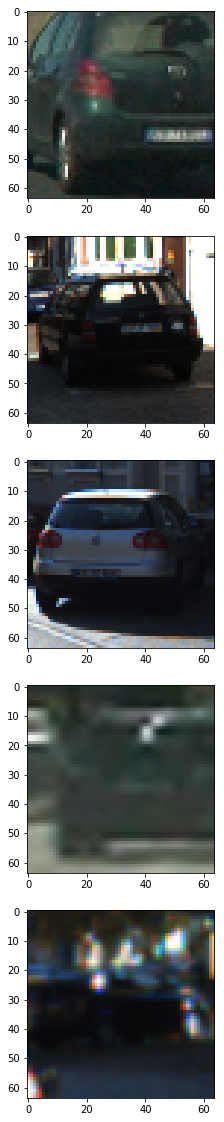

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from random import randint

%matplotlib inline

# Read in all the car images

car_list = []
car_list += glob.glob('dataset/vehicles/vehicles/GTI_Far/image*.png')
car_list += glob.glob('dataset/vehicles/vehicles/GTI_Left/image*.png')
car_list += glob.glob('dataset/vehicles/vehicles/GTI_MiddleClose/image*.png')
car_list += glob.glob('dataset/vehicles/vehicles/GTI_Right/image*.png')
car_list += glob.glob('dataset/vehicles/vehicles/KITTI_extracted/*.png')

# Print some information about the images

print('Total number of car images: ', len(car_list))
example_car_img = cv2.imread(car_list[7778])
example_car_img = cv2.cvtColor(example_car_img, cv2.COLOR_BGR2RGB)
print('Shape of a single car image: ', example_car_img.shape)
print('Min pixel value: ', np.min(example_car_img), 'And Max pixel value: ', np.max(example_car_img))

# Choose 5 images randomly for display

example_car_images = []
for i in range(5):
    img_index = randint(0, len(car_list))
    img = cv2.imread(car_list[img_index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    example_car_images.append(img)

# plot images of cars

fig, list_ax = plt.subplots(5, 1, figsize=(40,20))
for i in range(5):
    list_ax[i].imshow(example_car_images[i])


Total number of non-car images:  8968
Shape of a single non-car image:  (64, 64, 3)
Min pixel value:  0 And Max pixel value:  213
{'data_type': dtype('float32'), 'n_cars': 8792, 'image_shape': (64, 64, 3), 'n_notcars': 8968}


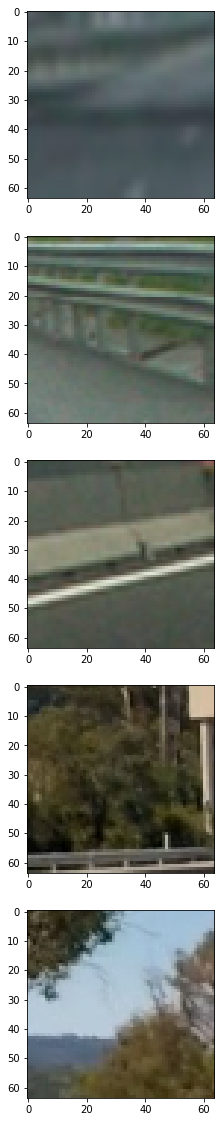

In [2]:
# Read in all the non-car images

notcar_list = []
notcar_list += glob.glob('dataset/non-vehicles/GTI/image*.PNG')
notcar_list += glob.glob('dataset/non-vehicles/Extras/extra*.PNG')

# Print some information about the images

print('Total number of non-car images: ', len(notcar_list))
example_non_car_img = cv2.imread(notcar_list[6666])
example_non_car_img = cv2.cvtColor(example_non_car_img, cv2.COLOR_BGR2RGB)
print('Shape of a single non-car image: ', example_non_car_img.shape)
print('Min pixel value: ', np.min(example_non_car_img), 'And Max pixel value: ', np.max(example_non_car_img))

example_non_car_images = []
for i in range(5):
    img_index = randint(0, len(notcar_list))
    img = cv2.imread(notcar_list[img_index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    example_non_car_images.append(img)

fig, list_ax = plt.subplots(5, 1, figsize=(40,20))
for i in range(5):
    list_ax[i].imshow(example_non_car_images[i])
    
# A function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

data_dict = data_look(car_list, notcar_list)
print(data_dict)

# Feature Extraction

## Color Histogram: achieve shape invarience

Length of Histogram Features:  96


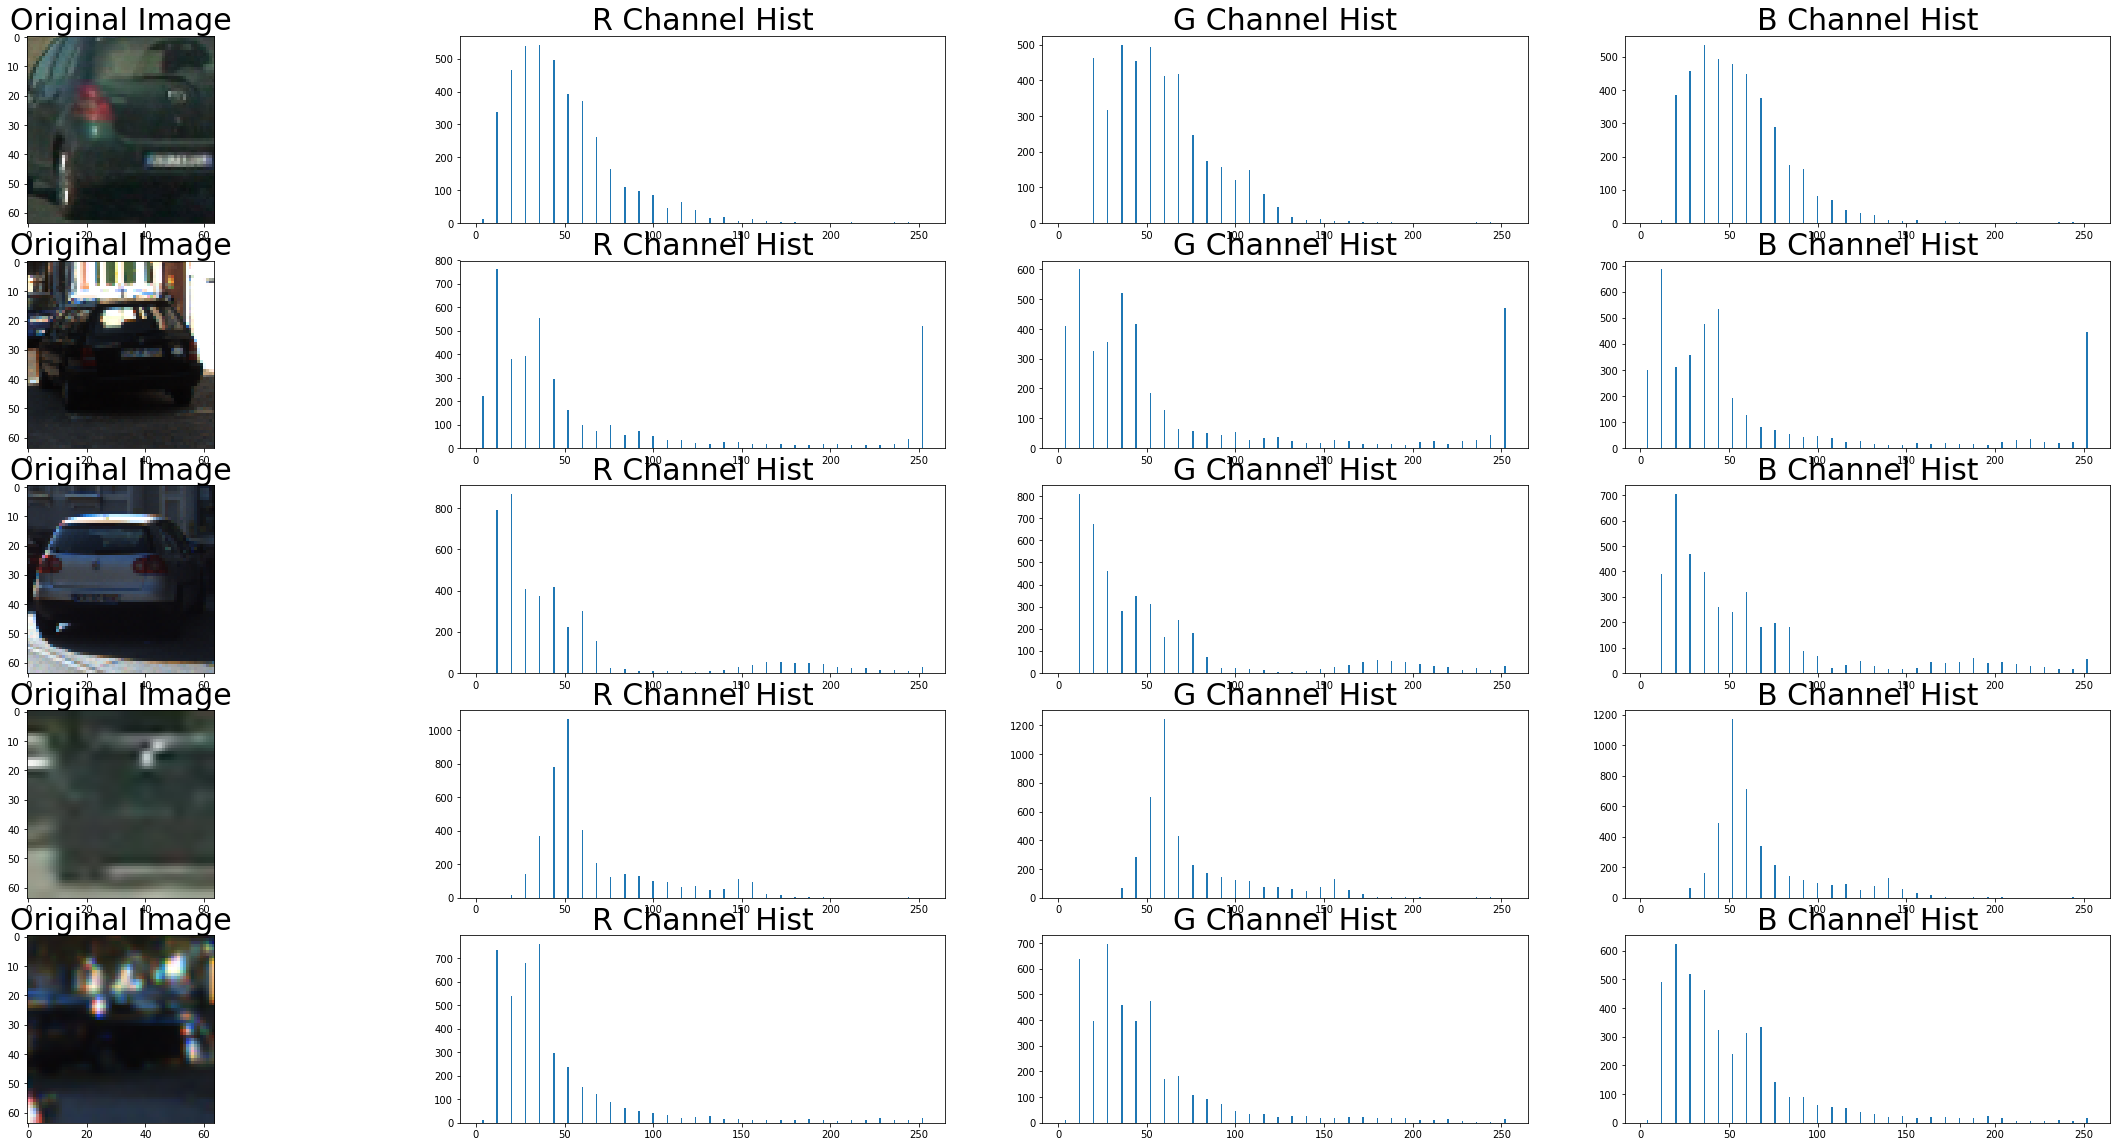

In [3]:
#############################################################
# A function to compute color histogram features  
# Takes image and optionally number of bins and range of
# values as input and returns histogram in all 3 channels
# along with bin centers and a feature vector consisting of
# cacatenated histograms of 3 channels
#############################################################
def color_hist(img, nbins=32, bins_range=(0, 256)):
    
    # Compute the histogram of the 3 channels separately
    
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    # Generate bin centers
    bin_edges = channel1_hist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    
    # Return the individual histograms, bin_centers and feature vector
    return channel1_hist, channel2_hist, channel3_hist, bin_centers, hist_features

fig, list_ax = plt.subplots(5, 4, figsize=(40,20))

for i in range(5):
    
    img = example_car_images[i]
    
    nbins = 32
    bins_range=(0, 256)
    
    rhist, ghist, bhist, bin_centers, hist_features = color_hist(img, nbins=nbins, bins_range=bins_range)
    
    list_ax[i][0].imshow(img)
    list_ax[i][0].set_title('Original Image', fontsize=30)
    list_ax[i][1].bar(bin_centers, hist_features[0:nbins])
    list_ax[i][1].set_title('R Channel Hist', fontsize=30)
    list_ax[i][2].bar(bin_centers, hist_features[nbins:2*nbins])
    list_ax[i][2].set_title('G Channel Hist', fontsize=30)
    list_ax[i][3].bar(bin_centers, hist_features[2*nbins:])
    list_ax[i][3].set_title('B Channel Hist', fontsize=30)

print('Length of Histogram Features: ', len(hist_features))

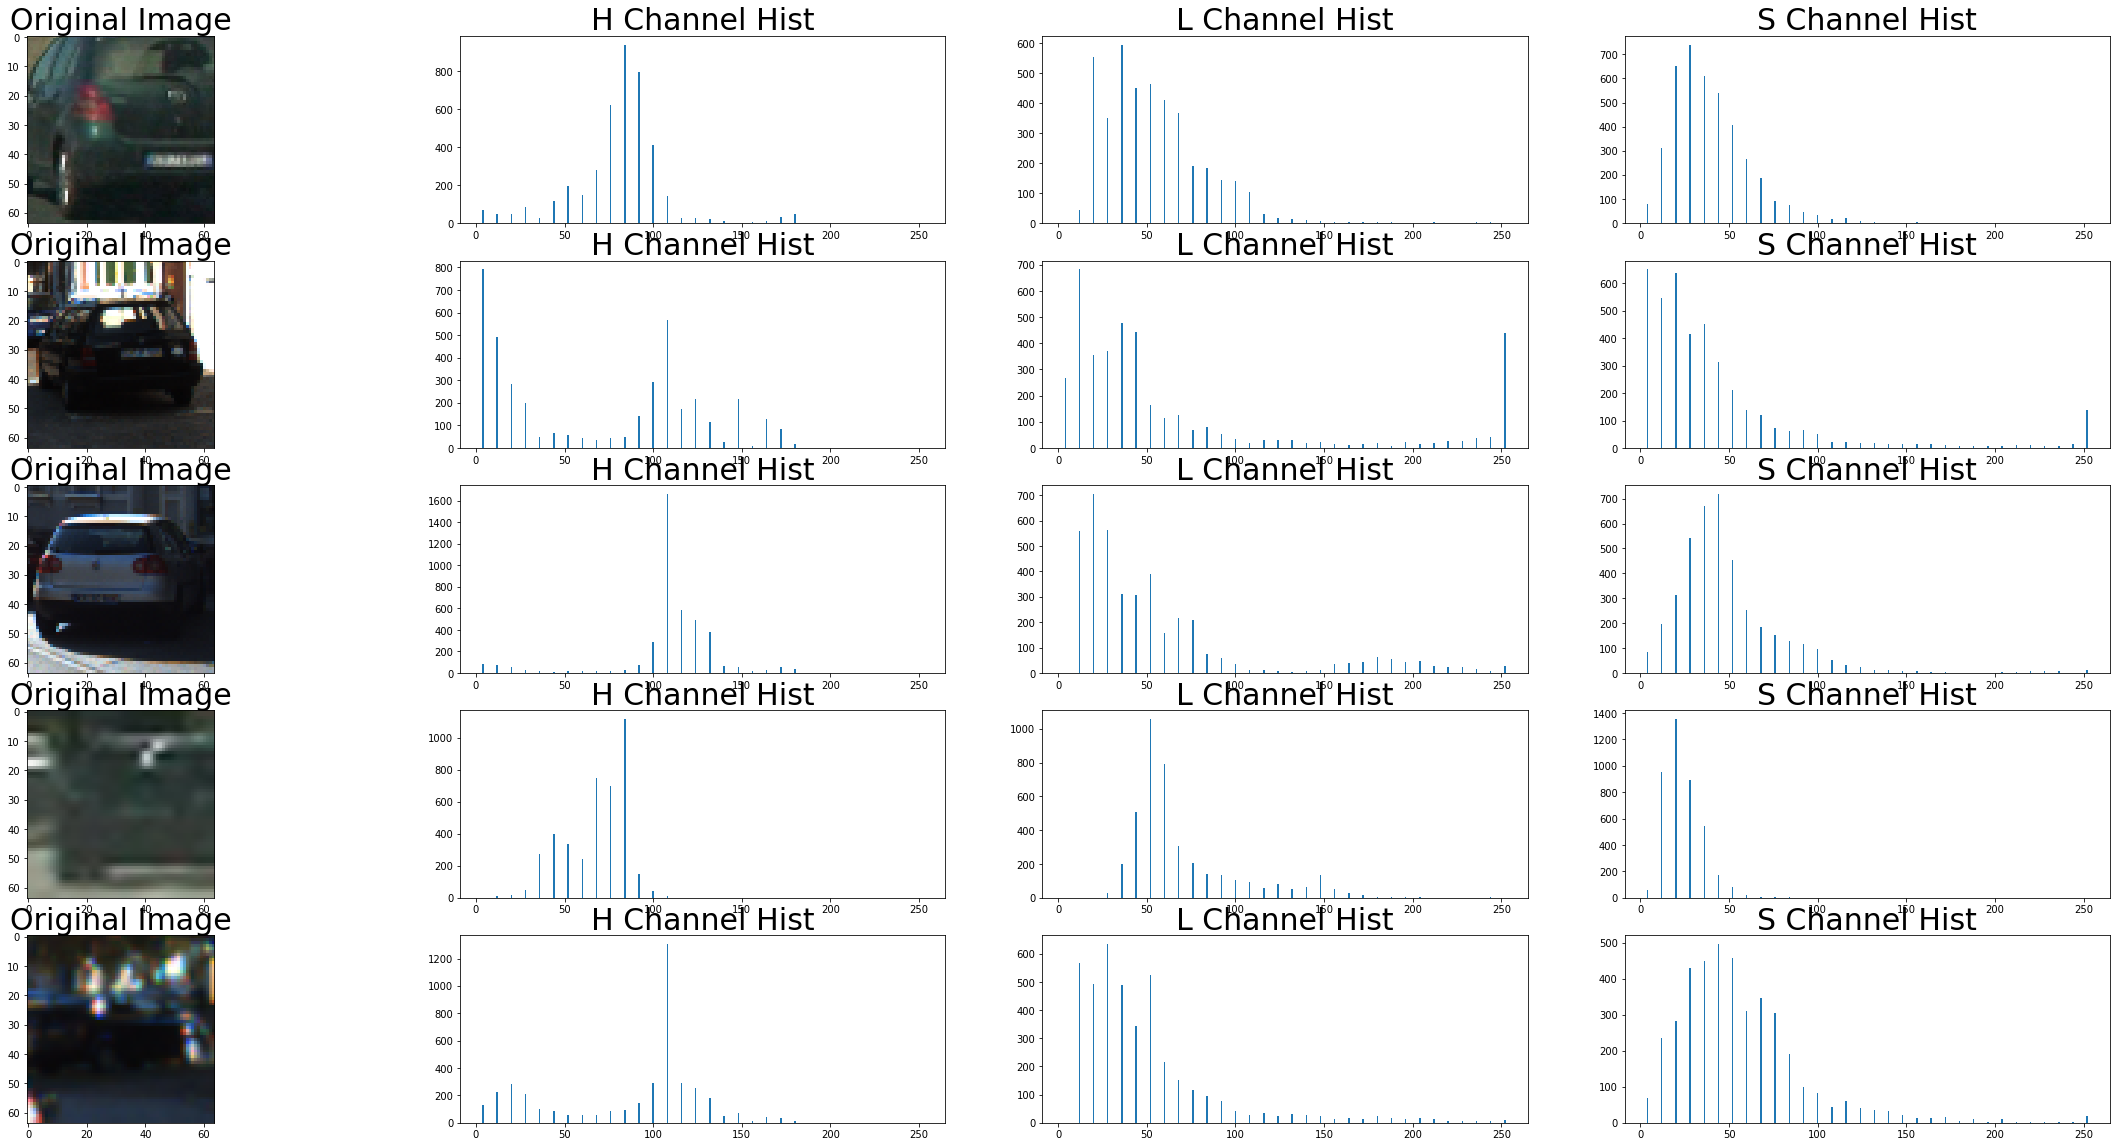

In [4]:
# Color Histogram in non-RGB color space:

################################################################
# A function to convert color space of the image
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
# Returns copy of passed in image.
################################################################
def convert_color_space(img, color_space='RGB'):
    
    # Convert image to new color space
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    
    return feature_image

fig, list_ax = plt.subplots(5, 4, figsize=(40,20))
for i in range(5):
    img = example_car_images[i]
    list_ax[i][0].imshow(img)
    list_ax[i][0].set_title('Original Image', fontsize=30)
    
    img = convert_color_space(img, 'HLS')
    nbins = 32
    bins_range=(0, 256)
    rhist, ghist, bhist, bin_centers, hist_features = color_hist(img, nbins=nbins, bins_range=bins_range)
    list_ax[i][1].bar(bin_centers, hist_features[0:nbins])
    list_ax[i][1].set_title('H Channel Hist', fontsize=30)
    list_ax[i][2].bar(bin_centers, hist_features[nbins:2*nbins])
    list_ax[i][2].set_title('L Channel Hist', fontsize=30)
    list_ax[i][3].bar(bin_centers, hist_features[2*nbins:])
    list_ax[i][3].set_title('S Channel Hist', fontsize=30)


## Explore Color Spaces: achieve color invarience

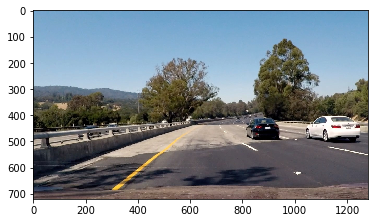

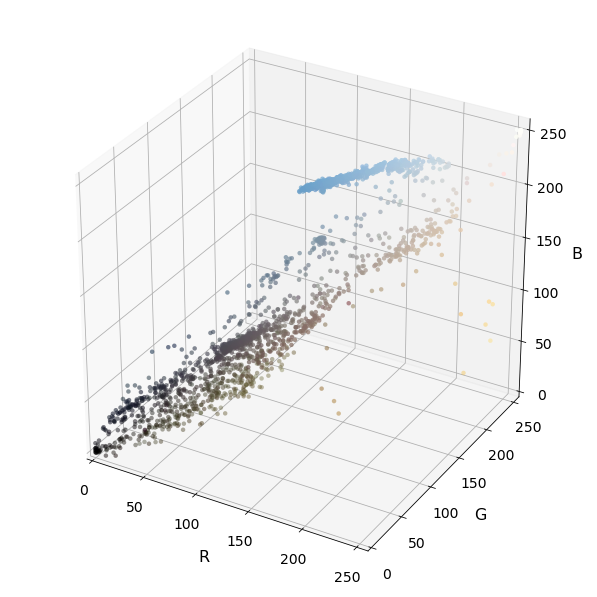

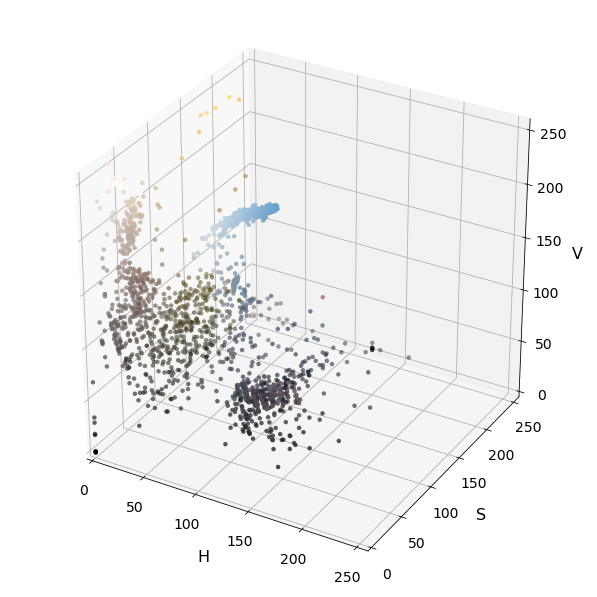

In [5]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read and plot color image
img = cv2.imread('test_images/test4.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

## Spacial Binning: raw color pixel features in different color spaces

Raw Color Feature Length:  3072


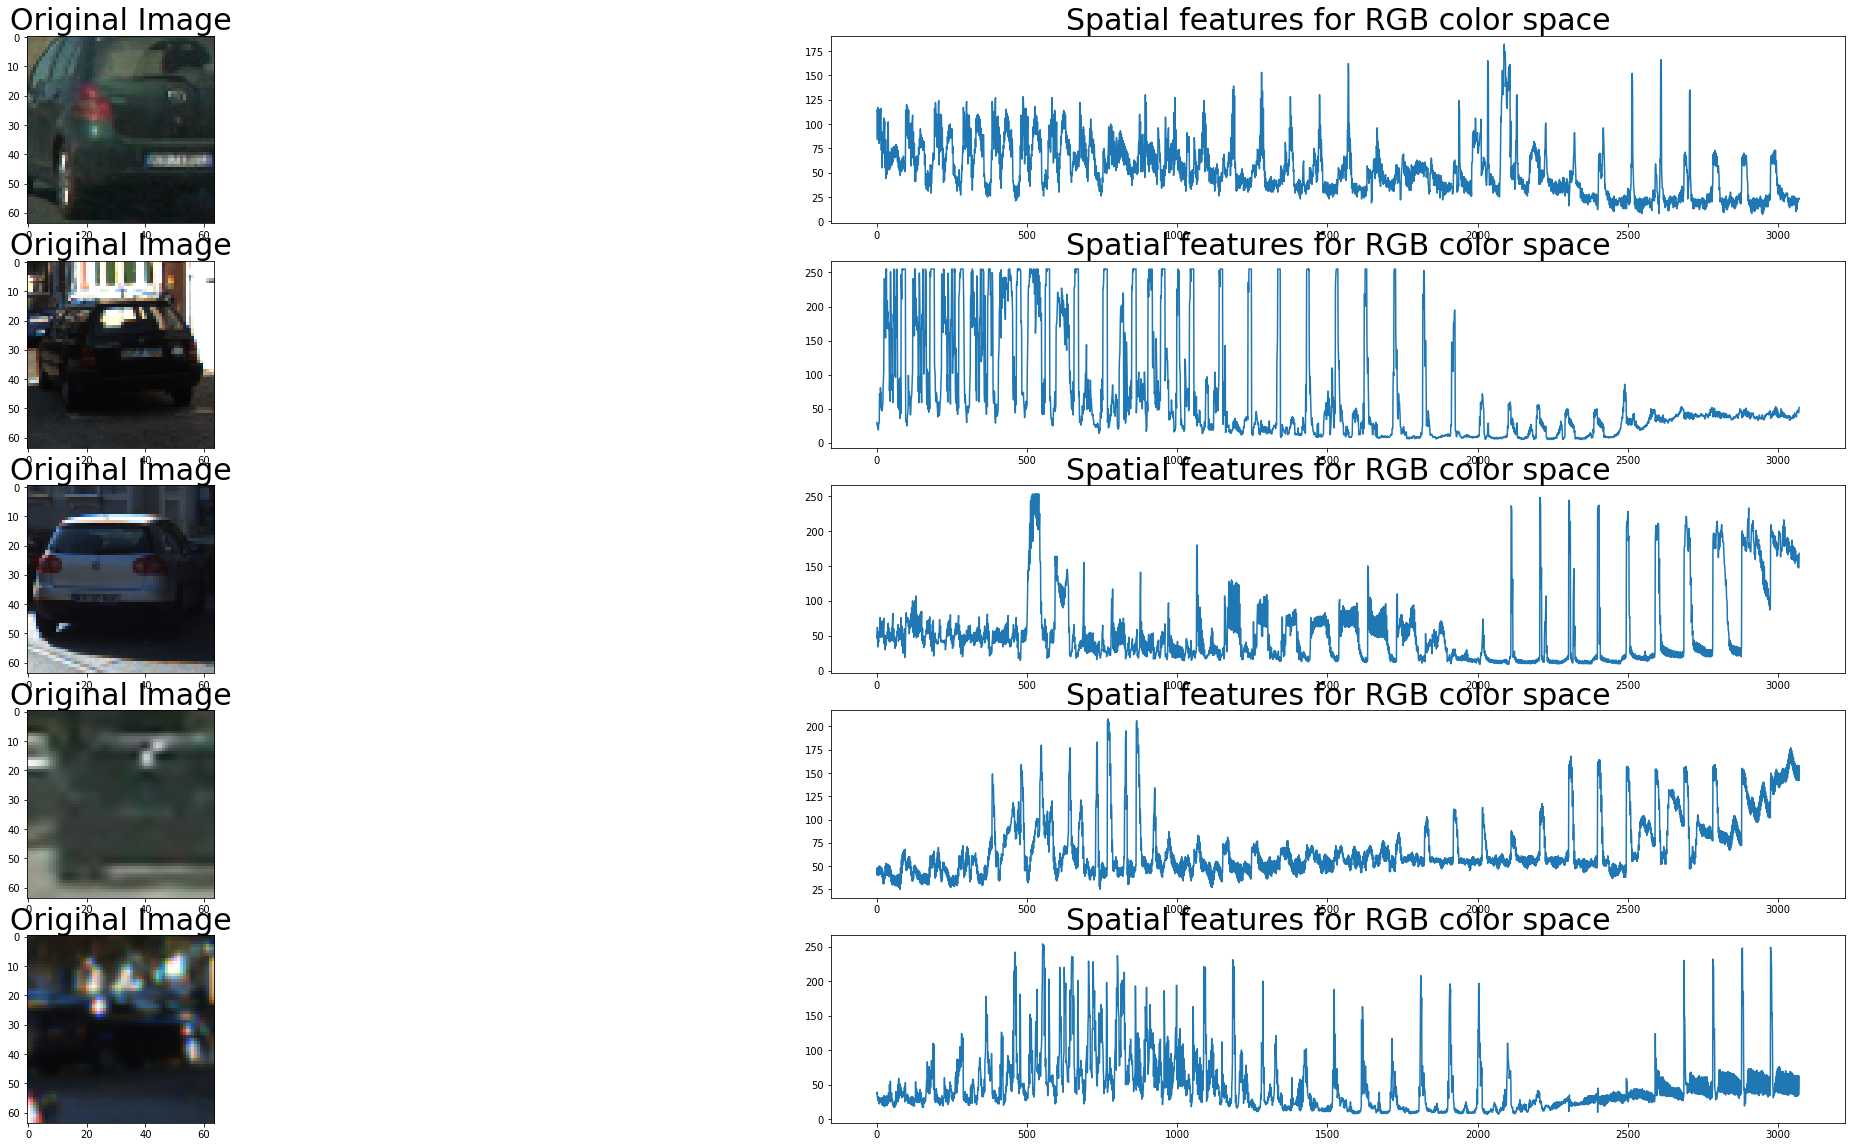

In [6]:
# Although template matching doesn't work; raw pixel intensities can still be useful.

##############################################################################
# A function to convert an image to 1-D raw color pixel features  
# optionally pass in size to resize the image
# output size = size[0] * size[1] * num_channels
##############################################################################
def bin_spatial(img, size=(32, 32)):
    
    # Use cv2.resize().ravel() to create the feature vector
    small_img = cv2.resize(feature_image, size)
    
    # convert to 1-D
    features = small_img.ravel()
    
    # Return the feature vector
    return features

fig, list_ax = plt.subplots(5, 2, figsize=(40,20))
for i in range(5):
    img = example_car_images[i]
    feature_image = convert_color_space(img, color_space='RGB')
    raw_color_features = bin_spatial(feature_image, size=(32, 32))
    #bin_centers = range(32*32*3)
    list_ax[i][0].imshow(img)
    list_ax[i][0].set_title('Original Image', fontsize=30)
    list_ax[i][1].plot(raw_color_features)
    list_ax[i][1].set_title('Spatial features for RGB color space', fontsize=30)

print('Raw Color Feature Length: ', len(raw_color_features))

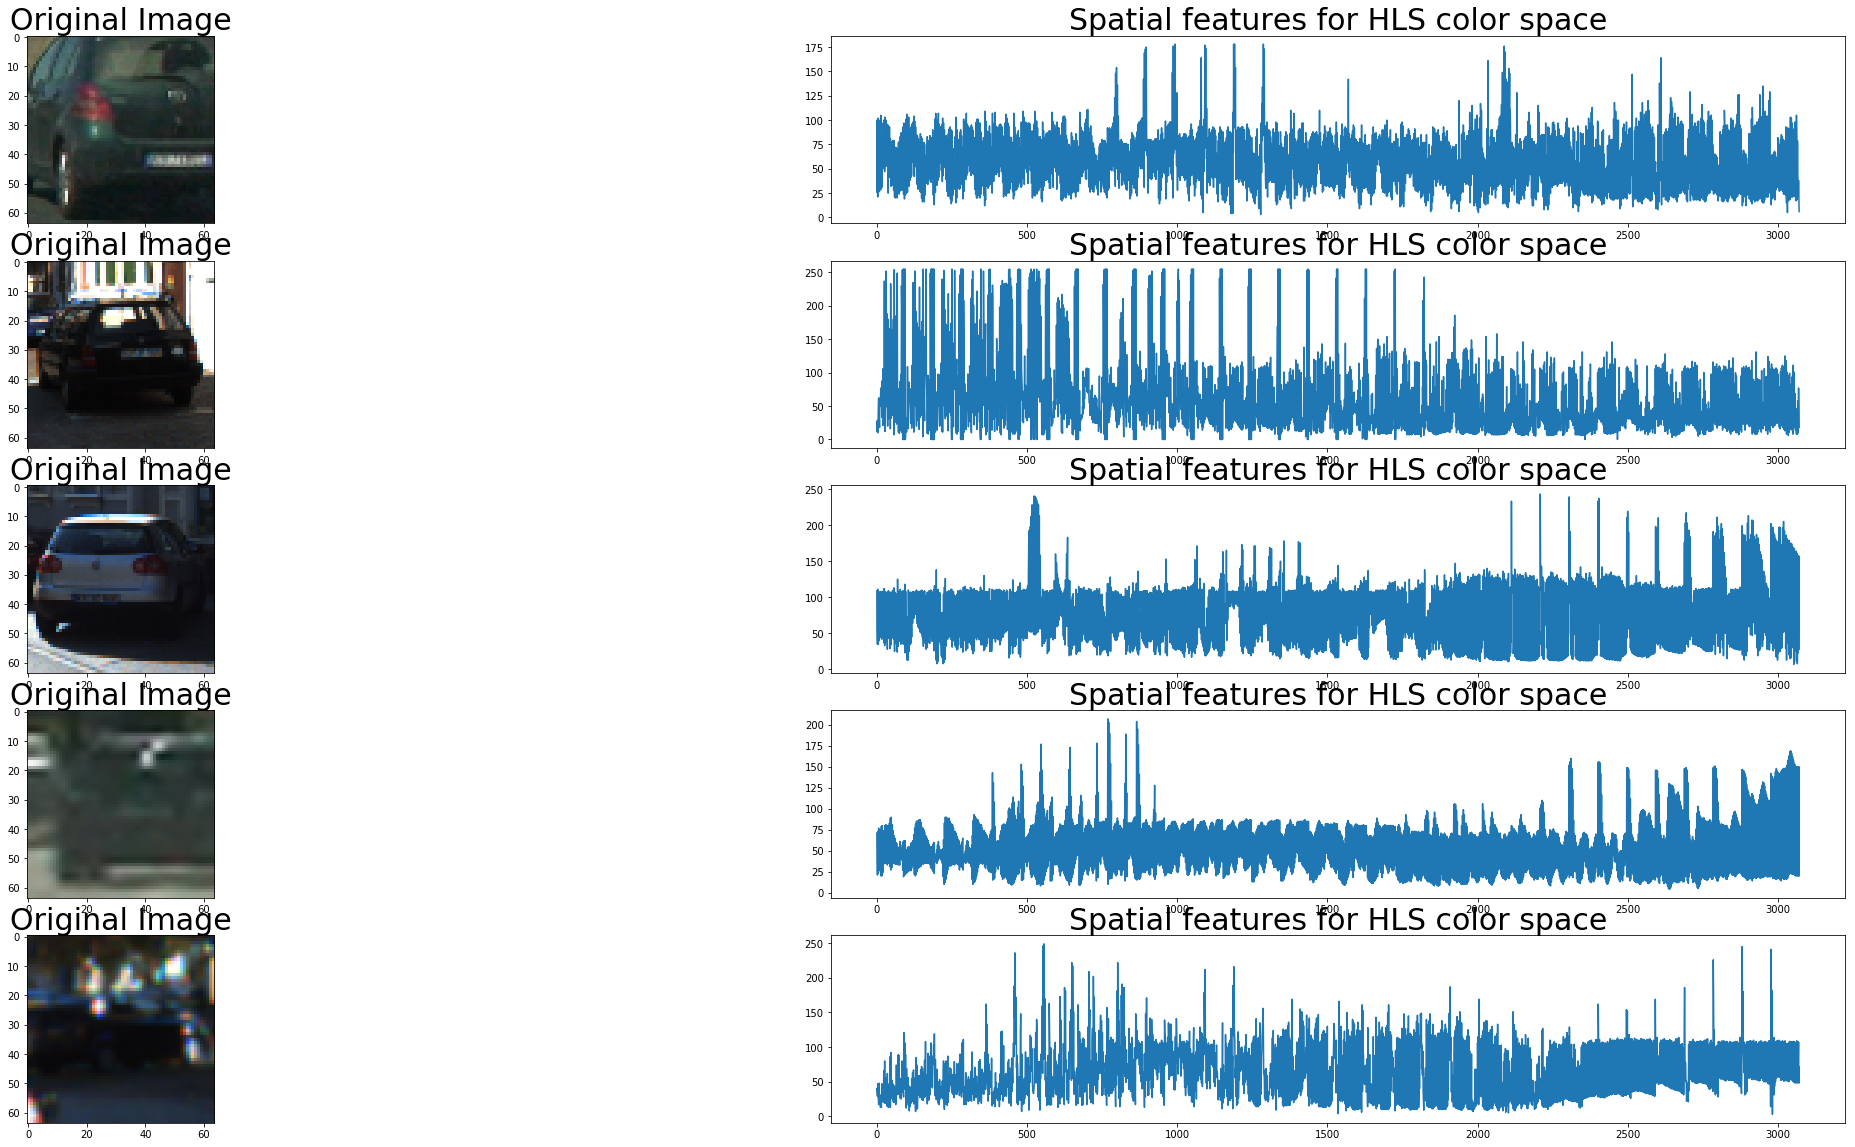

In [7]:
fig, list_ax = plt.subplots(5, 2, figsize=(40,20))
for i in range(5):
    img = example_car_images[i]
    feature_image = convert_color_space(img, color_space='HLS')
    raw_color_features = bin_spatial(feature_image, size=(32, 32))
    #bin_centers = range(32*32*3)
    list_ax[i][0].imshow(img)
    list_ax[i][0].set_title('Original Image', fontsize=30)
    list_ax[i][1].plot(raw_color_features)
    list_ax[i][1].set_title('Spatial features for HLS color space', fontsize=30)

## Combining Color Spaces with Color Histograms

Length of RGB Features:  3168
Shape of RGB Features:  (3168,)
DType of RGB Features:  int64
Length of HLS Features:  3168
Shape of HLS Features:  (3168,)
DType of HLS Features:  int64


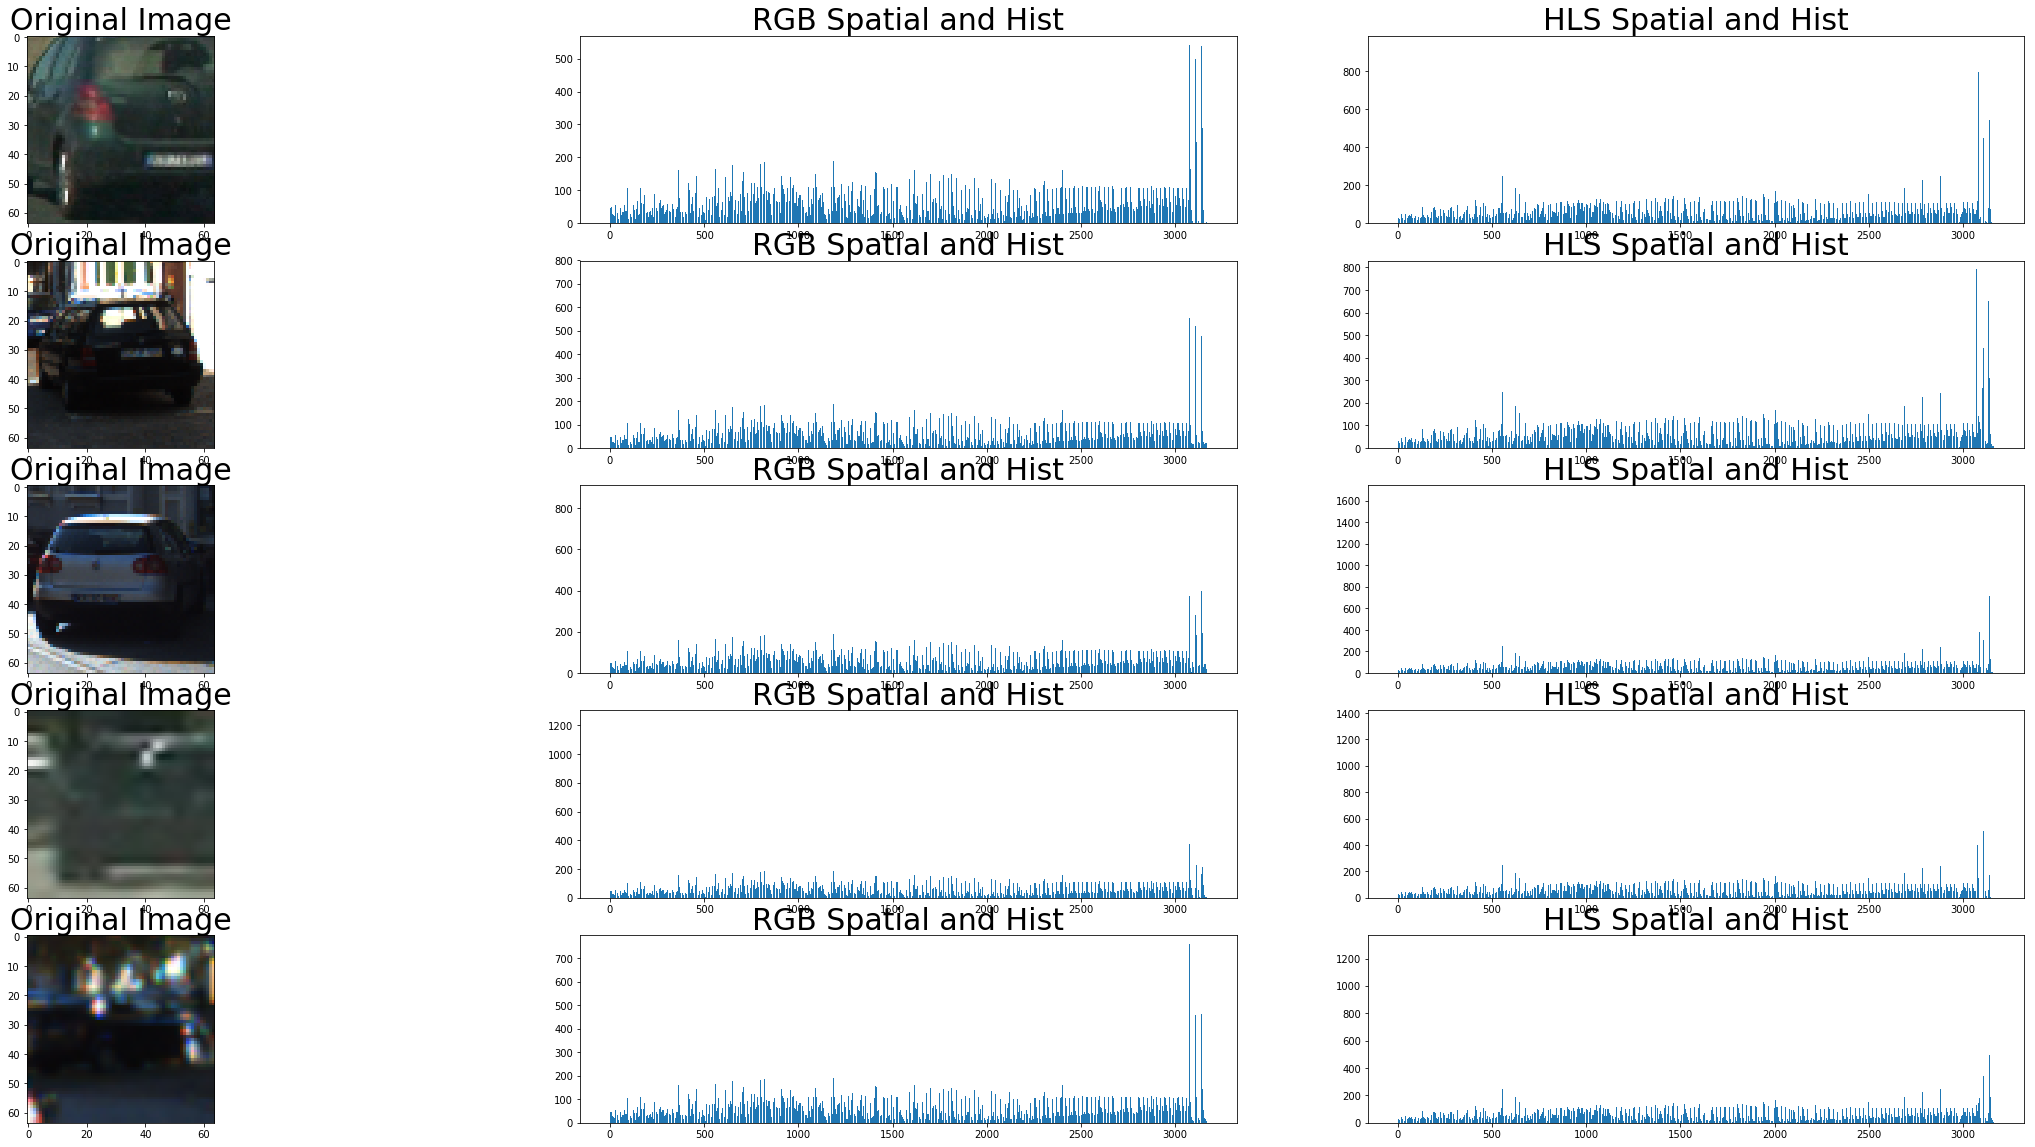

In [9]:

#########################################################################
# A helper function to facilitate all three:
# 1. Color Space Conversion
# 2. Spatial Binning of raw pixel values of image in that color space
# 3. histogram feature of all channels of image in that color space.
#
# output will be concatenation of #2 and #3 above.
#########################################################################
def extract_color_features(img, color_space='RGB', bin_size=(32, 32), nbins_hist=32, bins_range_hist=(0, 256)):
    
    # Convert image to new color space
    feature_image = convert_color_space(img, color_space=color_space)
    
    # spacially bin the image
    spatial_features = bin_spatial(feature_image, size=bin_size)
    
    # get histogram of this binned image
    rhist, ghist, bhist, bin_centers, hist_features = color_hist(
        feature_image, 
        nbins=nbins_hist, 
        bins_range=bins_range_hist)
    
    features = np.concatenate((spatial_features, hist_features))
    
    return features

#########################################################################
# A helper function to facilitate all three:
# 1. Color Space Conversion
# 2. Spatial Binning of raw pixel values of image in that color space
# 3. histogram feature of all channels of image in that color space.
#
# returns #2 and #3 separately instead of concatenating them
#########################################################################

def extract_color_features2(img, color_space='RGB', bin_size=(32, 32), nbins_hist=32, bins_range_hist=(0, 256)):
    
    # Convert image to new color space
    feature_image = convert_color_space(img, color_space=color_space)
    
    # spacially bin the image
    spatial_features = bin_spatial(feature_image, size=bin_size)
    
    # get histogram of this binned image
    rhist, ghist, bhist, bin_centers, hist_features = color_hist(
        feature_image, 
        nbins=nbins_hist, 
        bins_range=bins_range_hist)
    
    return spatial_features, hist_features

fig, list_ax = plt.subplots(5, 3, figsize=(40,20))

for i in range(5):
    
    img = example_car_images[i]
    
    bin_size = (32, 32)
    nbins_hist = 32
    bins_range_hist=(0, 256)
    
    rgb_features = extract_color_features(img, color_space='RGB', bin_size=bin_size, 
                                               nbins_hist=nbins_hist, bins_range_hist=bins_range_hist)
    hls_features = extract_color_features(img, color_space='HLS', bin_size=bin_size, 
                                               nbins_hist=nbins_hist, bins_range_hist=bins_range_hist)
    bin_centers = range(len(rgb_features))
    list_ax[i][0].imshow(img)
    list_ax[i][0].set_title('Original Image', fontsize=30)
    list_ax[i][1].bar(bin_centers, rgb_features)
    list_ax[i][1].set_title('RGB Spatial and Hist', fontsize=30)
    list_ax[i][2].bar(bin_centers, hls_features)
    list_ax[i][2].set_title('HLS Spatial and Hist', fontsize=30)
    
print('Length of RGB Features: ', len(rgb_features))
print('Shape of RGB Features: ', rgb_features.shape)
print('DType of RGB Features: ', rgb_features.dtype)

print('Length of HLS Features: ', len(hls_features))
print('Shape of HLS Features: ', hls_features.shape)
print('DType of HLS Features: ', hls_features.dtype)

##  Gradient Features: Calculate and Visualize Histogram of Oriented Gradient features

C:\Users\kekambli\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Length of HOG feature:  7
Type of HOG feature:  <class 'numpy.ndarray'>
Shape of HOG feature:  (7, 7, 2, 2, 9)


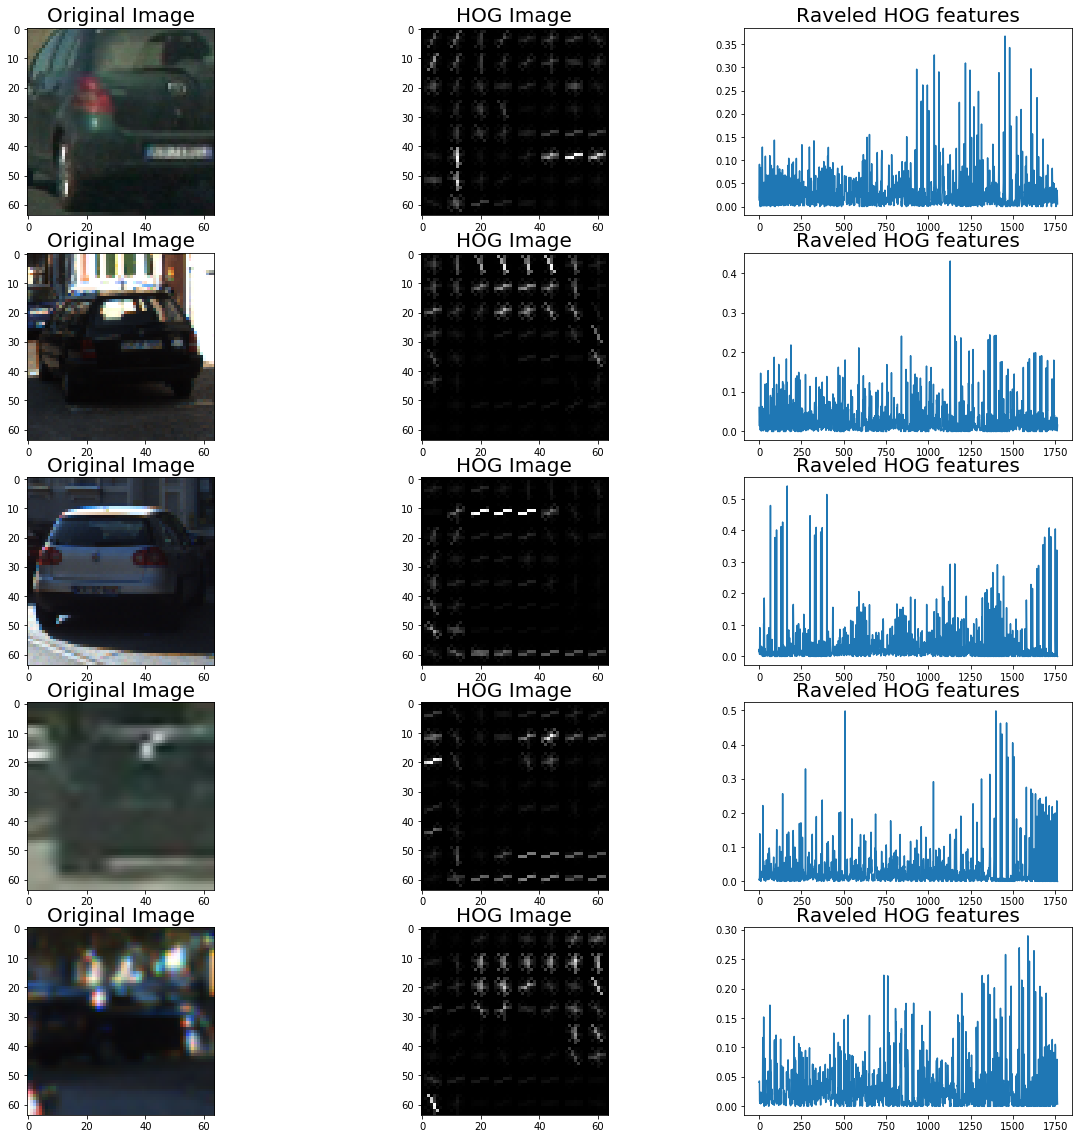

In [18]:
from skimage.feature import hog

########################################################################
# A function to return HOG features and optionally an image 
# for visualization
# inputs: 
#   image, 
#   orient - as number of bins to categorize directions in
#   pix_per_cell - number of pixels to include in 1 cell so that their direction is aggregated 
#   cell_per_block -
#   transform_sqrt - 
#   vis - whether or not to return image for visualization
#   feature_vec - whether or not to return feature vector
########################################################################
def get_hog_features(img, orient, pix_per_cell, cell_per_block, transform_sqrt = False, vis=False, feature_vec=True):
    
    if vis == True:
        
        features, hog_image = hog(
            img, 
            orientations=orient, 
            pixels_per_cell=(pix_per_cell, pix_per_cell),
            cells_per_block=(cell_per_block, cell_per_block), 
            transform_sqrt=transform_sqrt, 
            visualise=True, 
            feature_vector=False)
        
        return features, hog_image
    
    else:      
        
        features = hog(
            img, 
            orientations=orient, 
            pixels_per_cell=(pix_per_cell, pix_per_cell), 
            cells_per_block=(cell_per_block, cell_per_block), 
            transform_sqrt=transform_sqrt, 
            visualise=False, 
            feature_vector=feature_vec)
        
        return features

pix_per_cell = 8
cell_per_block = 2
orient = 9

fig, list_ax = plt.subplots(5, 3, figsize=(20,20))
for i in range(5):
    img = example_car_images[i]
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    features, hog_image = get_hog_features(
        gray, 
        orient, 
        pix_per_cell, 
        cell_per_block, 
        vis=True, 
        feature_vec=False)
    list_ax[i][0].imshow(img)
    list_ax[i][0].set_title('Original Image', fontsize=20)
    list_ax[i][1].imshow(hog_image, cmap='gray')
    list_ax[i][1].set_title('HOG Image', fontsize=20)
    list_ax[i][2].plot(features.ravel())
    list_ax[i][2].set_title('Raveled HOG features', fontsize=20)

print('Length of HOG feature: ', len(features))
print('Type of HOG feature: ', type(features))
print('Shape of HOG feature: ', features.shape)

## Combining and Normalizing the Features

C:\Users\kekambli\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


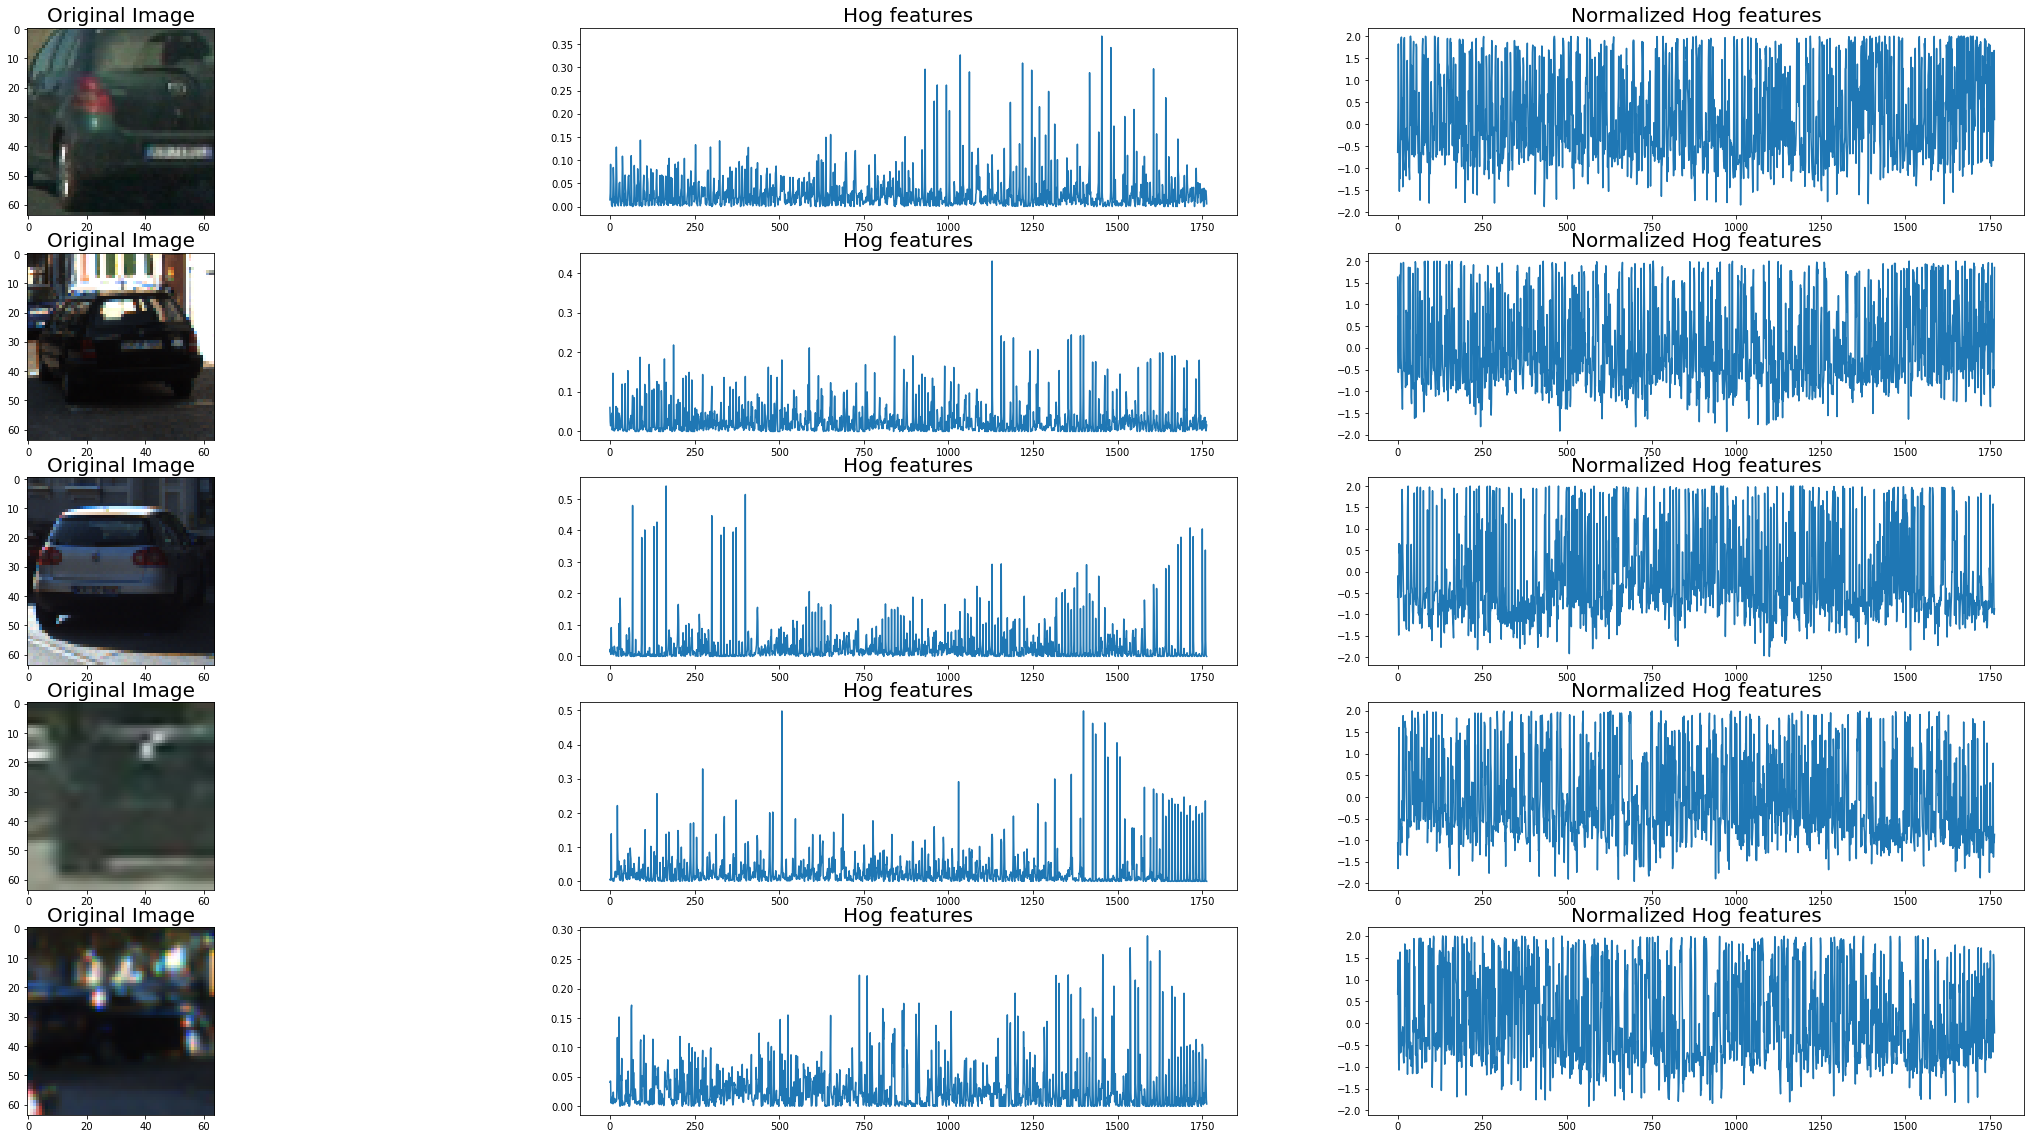

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

########################################################################
# A function to normalize different set of features
# Takes list of feature vectors as input
# returns normalized 1-D vector combining the feature vectors passed in
########################################################################
def normalize_features(feature_list):
    # Create an array stack, NOTE: StandardScaler() expects np.float64
    X = np.vstack(feature_list).astype(np.float64)
    
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    
    return scaled_X

color_features = []
hog_features = []

for i in range(5):
    img = example_car_images[i]
    
    color_space = 'RGB'
    bin_size = (32, 32)
    nbins_hist = 32
    bins_range_hist=(0, 256)
    pix_per_cell = 8
    cell_per_block = 2
    orient = 9
    
    rgb_features = extract_color_features(
        img, 
        color_space=color_space, 
        bin_size=bin_size, 
        nbins_hist=nbins_hist, 
        bins_range_hist=bins_range_hist)
    
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    hog_feature = get_hog_features(
        gray, 
        orient, 
        pix_per_cell, 
        cell_per_block, 
        vis=False, 
        feature_vec=True)
    
    color_features.append(rgb_features)
    hog_features.append(hog_feature)

normalized_color_features = normalize_features(color_features)
normalized_hog_features = normalize_features(hog_features)

fig, list_ax = plt.subplots(5, 3, figsize=(40,20))

for i in range(5):
    img = example_car_images[i]
    list_ax[i][0].imshow(img)
    list_ax[i][0].set_title('Original Image', fontsize=20)
    list_ax[i][1].plot(hog_features[i])
    list_ax[i][1].set_title('Hog features', fontsize=20)
    list_ax[i][2].plot(normalized_hog_features[i])
    list_ax[i][2].set_title('Normalized Hog features', fontsize=20)
    

# Training a Classifier

## TODO: Support Vector Machines (SVM) parameter tuning with GridSearchCV

### Trying with Color Features only

In [22]:

########################################################################
# A function to get features of all images in the given dataset
# Takes list of image filenames as input
# returns combined color features i.e. Spatial Binning + Color Hist
########################################################################
def get_dataset_features(dataset):
    
    features = []

    for fname in dataset:

        # read each image of the dataset
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # parameters of color feature extraction
        color_space = 'RGB'
        bin_size = (32, 32)
        nbins_hist = 32
        bins_range_hist=(0, 256)
        
        # extract features: use above parameters
        rgb_features = extract_color_features(
            img, 
            color_space=color_space, 
            bin_size=bin_size, 
            nbins_hist=nbins_hist, 
            bins_range_hist=bins_range_hist)
        
        features.append(rgb_features)
        
    return features

# get features from car dataset
car_features = get_dataset_features(car_list)

# print some stats of the car features
print('number of car images: ', len(car_list))
print('number of car_features: ', len(car_features))
print('shape of each row of car_features list: ', car_features[0].shape)

# get features from car dataset
non_car_features = get_dataset_features(notcar_list)

# print some stats of the car features
print('number of non-car images: ', len(notcar_list))
print('number of non_car_features: ', len(non_car_features))
print('shape of each row of non_car_features list: ', non_car_features[0].shape)

normalized_color_features = normalize_features((car_features, non_car_features))

print('Shape of Normalized features: ', normalized_color_features.shape)


number of car images:  8792
number of car_features:  8792
shape of each row of car_features list:  (3168,)
number of non-car images:  8968
number of non_car_features:  8968
shape of each row of non_car_features list:  (3168,)
Shape of Normalized features:  (17760, 3168)


In [23]:
from sklearn.model_selection import train_test_split
import time
from sklearn.svm import LinearSVC

############################################################################
# A function to shuffle passed in dataset,
# split the dataset in training and test set and
# train linear SVM classifier
# returnes the trained classifier.
############################################################################
def train_test_classifier(normalized_features, labels):

    # Split up data into randomized (shuffled) training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        normalized_features, labels, test_size=0.2, random_state=rand_state)

    print('Number of training images: ', len(X_train))
    print('Number of test images: ', len(X_test))
    
    # Use a linear SVC 
    svc = LinearSVC()

    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

    t=time.time()
    n_predict = 10
    print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
    print('For these',n_predict, 'labels: ', y_test[0:n_predict])
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')
    
    return svc

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))
print('Length of labels: ', len(y))

train_test_classifier(normalized_color_features, y)

Length of labels:  17760
Number of training images:  14208
Number of test images:  3552
4.27 Seconds to train SVC...
Test Accuracy of SVC =  0.9077
My SVC predicts:  [ 0.  0.  0.  1.  1.  1.  0.  1.  0.  1.]
For these 10 labels:  [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  1.]
0.002 Seconds to predict 10 labels with SVC


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Classifier using HOG features:

In [27]:
# Get features for all car and non-car datasets and normalize them:

def get_dataset_hog_features(dataset, color_space='RGB', hog_channel=0):
    
    features = []

    for fname in dataset:

        # read each image of the dataset
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if color_space == 'GRAY':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        else:
            feature_image = convert_color_space(img, color_space)
        
        # parameters of hog feature extraction
        pix_per_cell = 8
        cell_per_block = 2
        orient = 9
        
        if hog_channel == 'ALL':
            
            hog_features = []
            
            for channel in range(feature_image.shape[2]):
                
                hog_features.append(
                    get_hog_features(
                        feature_image[:,:,channel], 
                        orient, 
                        pix_per_cell, 
                        cell_per_block, 
                        transform_sqrt = True,
                        vis=False, 
                        feature_vec=True))
                
            hog_features = np.ravel(hog_features)
        
        elif hog_channel == 'GRAY':
            
            hog_features = get_hog_features(
                feature_image, 
                orient, 
                pix_per_cell, 
                cell_per_block, 
                transform_sqrt = True,
                vis=False, 
                feature_vec=True)
        else:
            
            hog_features = get_hog_features(
                feature_image[:,:,hog_channel], 
                orient, 
                pix_per_cell, 
                cell_per_block, 
                transform_sqrt = True,
                vis=False, 
                feature_vec=True)
        
        features.append(hog_features)
        
    return features

# get features from car dataset
car_hog_features = get_dataset_hog_features(car_list, 'HLS', 2)

sample_size = 4000
car_hog_features = car_hog_features[0:sample_size]

# print some stats of the car features
print('number of car images: ', len(car_list))
print('number of car_features: ', len(car_hog_features))
print('shape of each row of car_features list: ', car_hog_features[0].shape)

# get features from car dataset
non_car_hog_features = get_dataset_hog_features(notcar_list, 'HLS', 2)

non_car_hog_features = non_car_hog_features[0:sample_size]

# print some stats of the car features
print('number of non-car images: ', len(notcar_list))
print('number of non_car_features: ', len(non_car_hog_features))
print('shape of each row of non_car_features list: ', non_car_hog_features[0].shape)

normalized_hog_features = normalize_features((car_hog_features, non_car_hog_features))

print('Shape of Normalized features: ', normalized_hog_features.shape)

# Define the labels vector
y = np.hstack((np.ones(len(car_hog_features)), np.zeros(len(non_car_hog_features))))
print('Length of labels: ', len(y))

hog_classifier = train_test_classifier(normalized_hog_features, y)

C:\Users\kekambli\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


number of car images:  8792
number of car_features:  4000
shape of each row of car_features list:  (1764,)
number of non-car images:  8968
number of non_car_features:  4000
shape of each row of non_car_features list:  (1764,)
Shape of Normalized features:  (8000, 1764)
Length of labels:  8000
Number of training images:  6400
Number of test images:  1600
6.14 Seconds to train SVC...
Test Accuracy of SVC =  0.9225
My SVC predicts:  [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
0.00199 Seconds to predict 10 labels with SVC


## Implement Sliding Window to retrieve cars:

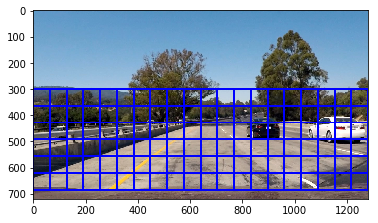

In [28]:
image = mpimg.imread('test_images/test1.jpg')
#plt.imshow(image)

############################################################
# A function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output
############################################################
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    
    # Make a copy of the image
    imcopy = np.copy(img)
    
    # Iterate through the bounding boxes
    for bbox in bboxes:
        
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    
    # Return the image copy with boxes drawn
    return imcopy
    
############################################################
# A function to retrieve windows from given image
# takes an image, start and stop positions in both x and y directions, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
############################################################
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

windows = slide_window(
    image, 
    x_start_stop=[None, None], 
    y_start_stop=[300, None], 
    xy_window=(128, 128), 
    xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

In [61]:
#########################################################################
# A function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
#########################################################################
def single_img_features(
    img, 
    color_space='RGB', 
    spatial_size=(32, 32),                    
    hist_bins=32, 
    orient=9, 
    pix_per_cell=8, 
    cell_per_block=2, 
    hog_channel=0, 
    spatial_feat=True, 
    hist_feat=True, 
    hog_feat=True):    
    
    #1) Define an empty list to receive features
    img_features = []
    
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        rhist, ghist, bhist, bin_centers, hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(
                    get_hog_features(
                        feature_image[:,:,channel], 
                        orient, 
                        pix_per_cell, 
                        cell_per_block, 
                        transform_sqrt = True, 
                        vis=False, 
                        feature_vec=True))      
            hog_features = np.ravel(hog_features)
        else:
            hog_features = get_hog_features(
                feature_image[:,:,hog_channel], 
                orient, 
                pix_per_cell, 
                cell_per_block, 
                transform_sqrt = True,
                vis=False, 
                feature_vec=True)
            
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

In [59]:
##########################################################################
# A function to extract features from a list of images
# This function combines extract_color_features and extract_hog_features
# functionality in one function.
# color features are obtained by calling bin_spatial() and color_hist()
# hot features are obtained by calling get_hog_features()
##########################################################################
def extract_features(
    imgs, 
    color_space='RGB', 
    spatial_size=(32, 32), 
    hist_bins=32, 
    orient=9, 
    pix_per_cell=8, 
    cell_per_block=2, 
    hog_channel=0, 
    spatial_feat=True, 
    hist_feat=True, 
    hog_feat=True):
    
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            rhist, ghist, bhist, bin_centers, hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(
                        get_hog_features(
                            feature_image[:,:,channel], 
                            orient, 
                            pix_per_cell, 
                            cell_per_block, 
                            transform_sqrt = True,
                            vis=False, 
                            feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(
                    feature_image[:,:,hog_channel], 
                    orient, 
                    pix_per_cell, 
                    cell_per_block, 
                    transform_sqrt = True, 
                    vis=False, 
                    feature_vec=True)
                
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features


In [89]:
color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [300, None] # Min and max in y to search in slide_window()

car_features = extract_features(
    car_list, 
    color_space=color_space, 
    spatial_size=spatial_size, 
    hist_bins=hist_bins, 
    orient=orient, 
    pix_per_cell=pix_per_cell, 
    cell_per_block=cell_per_block, 
    hog_channel=hog_channel, 
    spatial_feat=spatial_feat, 
    hist_feat=hist_feat, 
    hog_feat=hog_feat)

# print some stats of the car features
print('number of car images: ', len(car_list))
print('number of car_features: ', len(car_features))
print('shape of each row of car_features list: ', car_features[0].shape)

notcar_features = extract_features(
    notcar_list, 
    color_space=color_space, 
    spatial_size=spatial_size, 
    hist_bins=hist_bins, 
    orient=orient, 
    pix_per_cell=pix_per_cell, 
    cell_per_block=cell_per_block, 
    hog_channel=hog_channel, 
    spatial_feat=spatial_feat, 
    hist_feat=hist_feat, 
    hog_feat=hog_feat)

# print some stats of the car features
print('number of non-car images: ', len(notcar_list))
print('number of non_car_features: ', len(notcar_features))
print('shape of each row of non_car_features list: ', notcar_features[0].shape)



C:\Users\kekambli\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


number of car images:  8792
number of car_features:  8792
shape of each row of car_features list:  (6108,)
number of non-car images:  8968
number of non_car_features:  8968
shape of each row of non_car_features list:  (6108,)


In [90]:
for i in range(len(car_features[0])):
    if type(car_features[0][i]) not in (type(1), type(1.1), np.dtype('float64')):
        print(type(car_features[0][i]))
        print(i)
        
        
#temp = normalize_features(car_features)
#np.vstack((car_features, notcar_features))

In [91]:
bad = car_features[0][771]
bad

0.0

In [92]:
X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
print('Shape of Normalized features: ', scaled_X.shape)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
print('Length of labels: ', len(y))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()



Shape of Normalized features:  (17760, 6108)
Length of labels:  17760
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
62.33 Seconds to train SVC...
Test Accuracy of SVC =  0.9707


In [93]:
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

C:\Users\kekambli\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


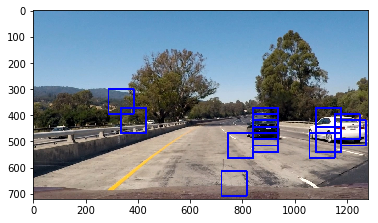

In [102]:
image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(
    image, 
    x_start_stop=[None, None], 
    y_start_stop=y_start_stop, 
    xy_window=(96, 96), 
    xy_overlap=(0.75, 0.75))

hot_windows = search_windows(
    image, 
    windows, 
    svc, 
    X_scaler, 
    color_space=color_space, 
    spatial_size=spatial_size,
    hist_bins=hist_bins, 
    orient=orient, 
    pix_per_cell=pix_per_cell, 
    cell_per_block=cell_per_block, 
    hog_channel=hog_channel, 
    spatial_feat=spatial_feat, 
    hist_feat=hist_feat, 
    hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

C:\Users\kekambli\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


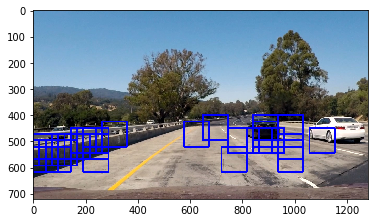

In [103]:
import pickle

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features2(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features2(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features2(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features2(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
            #print('size of hog features', hog_features.shape)
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            #print('size of spatial features', spatial_features.shape)
            
            temp1, temp2, temp3, temp4, hist_features = color_hist(subimg, nbins=hist_bins)
            #print('size of hist features', hist_features.shape)
            
            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img
    

orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins

img = mpimg.imread('test_images/test1.jpg')

ystart = 400
ystop = 656
scale = 1.5
    
out_img = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
plt.imshow(out_img)

In [108]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
#box_list = pickle.load( open( "bbox_pickle.p", "rb" ))

# Read in image similar to one shown above 
#image = mpimg.imread('test_image.jpg')
#heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
#heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
#heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
#heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
#labels = label(heatmap)
#draw_img = draw_labeled_bboxes(np.copy(image), labels)

#fig = plt.figure()
#plt.subplot(121)
#plt.imshow(draw_img)
#plt.title('Car Positions')
#plt.subplot(122)
#plt.imshow(heatmap, cmap='hot')
#plt.title('Heat Map')
#fig.tight_layout()

C:\Users\kekambli\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


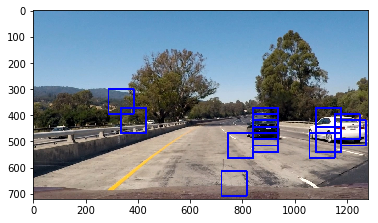

In [104]:
image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(
    image, 
    x_start_stop=[None, None], 
    y_start_stop=y_start_stop, 
    xy_window=(96, 96), 
    xy_overlap=(0.75, 0.75))

hot_windows = search_windows(
    image, 
    windows, 
    svc, 
    X_scaler, 
    color_space=color_space, 
    spatial_size=spatial_size,
    hist_bins=hist_bins, 
    orient=orient, 
    pix_per_cell=pix_per_cell, 
    cell_per_block=cell_per_block, 
    hog_channel=hog_channel, 
    spatial_feat=spatial_feat, 
    hist_feat=hist_feat, 
    hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

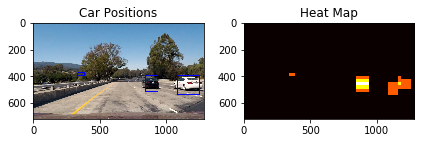

In [109]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)
heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

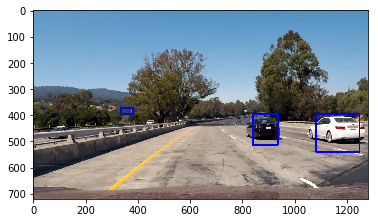

In [123]:
def process_image(image):
    
    draw_image = np.copy(image)

    windows = slide_window(
        image, 
        x_start_stop=[None, None], 
        y_start_stop=y_start_stop, 
        xy_window=(96, 96), 
        xy_overlap=(0.75, 0.75))

    hot_windows = search_windows(
        image, 
        windows, 
        svc, 
        X_scaler, 
        color_space=color_space, 
        spatial_size=spatial_size,
        hist_bins=hist_bins, 
        orient=orient, 
        pix_per_cell=pix_per_cell, 
        cell_per_block=cell_per_block, 
        hog_channel=hog_channel, 
        spatial_feat=spatial_feat, 
        hist_feat=hist_feat, 
        hog_feat=hog_feat)                       

    #window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)  
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat, hot_windows)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)

    return draw_img

image = mpimg.imread('test_images/test1.jpg')
result = process_image(image)
plt.imshow(result)

In [125]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

output_video = 'output_project_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("project_video.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video output_project_video.mp4
[MoviePy] Writing video output_project_video.mp4


100%|███████████████████████████████████████████████████████████████████████████▉| 1260/1261 [2:07:52<00:06,  6.66s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_project_video.mp4 

Wall time: 2h 7min 54s


In [126]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))